In [1]:
import os
import pandas as pd

In [32]:
import pandas as pd
import os

# Set the path to your folder
folder_path = '/Users/zoeslemmons/Desktop/MTA-elevators/outage_data'
file_path = '/Users/zoeslemmons/Desktop/MTA-elevators/outage_data/*.csv'  
filename = os.path.basename(file_path)

# Create an empty list to hold DataFrames
dataframes = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        df['timestamp'] = filename
        dataframes.append(df)

# Concatenate all DataFrames in the list
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows
combined_df.head()

,station,borough,trainno,equipmentno,equipmenttype,serving,ADA,isactive,nonNYCT,shortdescription,linesservedbyelevator,elevatorsgtfsstopid,elevatormrn,stationcomplexid,nextadanorth,nextadasouth,redundant,busconnections,alternativeroute,timestamp
0,1 Av,NaN,L,EL293,EL,E 14 St and Avenue A (SW corner) to Canarsie-b...,Y,Y,N,Street to Brooklyn-bound platform,L,L06,119,119,"117, L","120, L",0,"M15, M15 SBS, M14A SBS, M14D SBS",If you are on the street: Take a westbound M14...,outages_2025-07-29 06:24:35.375375.csv
1,1 Av,NaN,L,EL292,EL,E 14 St and Avenue A (NW corner) to 8 Av-bound...,Y,Y,N,Street to 8 Av-bound platform,L,L06,119,119,"117, L","120, L",0,"M15, M15 SBS, M14A SBS, M14D SBS",If you are on the street: Take a West Side-bou...,outages_2025-07-29 06:24:35.375375.csv
2,125 St,NaN,1,ES103,ES,125 St & Broadway (SE corner) to mezzanine\n,N,Y,N,Street to mezzanine,1,116,306,306,NaN,NaN,0,NaN,NaN,outages_2025-07-29 06:24:35.375375.csv
3,125 St,NaN,1,ES101,ES,mezzanine to 125 St & Broadway (SW corner),N,Y,N,Mezzanine to street,1,116,306,306,NaN,NaN,0,NaN,NaN,outages_2025-07-29 06:24:35.375375.csv
4,125 St,NaN,1,ES102,ES,125 St & Broadway (SW corner) to mezzanine,N,Y,N,Street to mezzanine,1,116,306,306,NaN,NaN,0,NaN,NaN,outages_2025-07-29 06:24:35.375375.csv


In [33]:
combined_df.shape

(61290, 20)

In [38]:
combined_df['timestamp'] = combined_df['timestamp'].str.replace('outages_', '')
combined_df.head(2)

,station,borough,trainno,equipmentno,equipmenttype,serving,ADA,isactive,nonNYCT,shortdescription,linesservedbyelevator,elevatorsgtfsstopid,elevatormrn,stationcomplexid,nextadanorth,nextadasouth,redundant,busconnections,alternativeroute,timestamp
0,1 Av,NaN,L,EL293,EL,E 14 St and Avenue A (SW corner) to Canarsie-b...,Y,Y,N,Street to Brooklyn-bound platform,L,L06,119,119,"117, L","120, L",0,"M15, M15 SBS, M14A SBS, M14D SBS",If you are on the street: Take a westbound M14...,2025-07-29 06:24:35.375375.csv
1,1 Av,NaN,L,EL292,EL,E 14 St and Avenue A (NW corner) to 8 Av-bound...,Y,Y,N,Street to 8 Av-bound platform,L,L06,119,119,"117, L","120, L",0,"M15, M15 SBS, M14A SBS, M14D SBS",If you are on the street: Take a West Side-bou...,2025-07-29 06:24:35.375375.csv


In [39]:
combined_df['timestamp'] = combined_df['timestamp'].str.replace('.csv', '')
combined_df.head(2)

,station,borough,trainno,equipmentno,equipmenttype,serving,ADA,isactive,nonNYCT,shortdescription,linesservedbyelevator,elevatorsgtfsstopid,elevatormrn,stationcomplexid,nextadanorth,nextadasouth,redundant,busconnections,alternativeroute,timestamp
0,1 Av,NaN,L,EL293,EL,E 14 St and Avenue A (SW corner) to Canarsie-b...,Y,Y,N,Street to Brooklyn-bound platform,L,L06,119,119,"117, L","120, L",0,"M15, M15 SBS, M14A SBS, M14D SBS",If you are on the street: Take a westbound M14...,2025-07-29 06:24:35.375375
1,1 Av,NaN,L,EL292,EL,E 14 St and Avenue A (NW corner) to 8 Av-bound...,Y,Y,N,Street to 8 Av-bound platform,L,L06,119,119,"117, L","120, L",0,"M15, M15 SBS, M14A SBS, M14D SBS",If you are on the street: Take a West Side-bou...,2025-07-29 06:24:35.375375


In [42]:
combined_df['timestamp']= pd.to_datetime(combined_df['timestamp'])

In [43]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61290 entries, 0 to 61289
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   station                61290 non-null  object        
 1   borough                0 non-null      float64       
 2   trainno                61110 non-null  object        
 3   equipmentno            61290 non-null  object        
 4   equipmenttype          61290 non-null  object        
 5   serving                61290 non-null  object        
 6   ADA                    61290 non-null  object        
 7   isactive               61290 non-null  object        
 8   nonNYCT                61290 non-null  object        
 9   shortdescription       60750 non-null  object        
 10  linesservedbyelevator  61290 non-null  object        
 11  elevatorsgtfsstopid    61290 non-null  object        
 12  elevatormrn            61290 non-null  object        
 13  s

In [44]:
#just making sure i only have elevators and not escalators
combined_df['equipmenttype'].value_counts()

equipmenttype
EL    36270
ES    25020
Name: count, dtype: int64

In [48]:
#ahh, I do have escalators, so let's get rid of those
el_df = combined_df[combined_df['equipmenttype'] == 'EL']
el_df.shape

(36270, 20)

In [51]:
el_out = el_df[el_df['isactive']=='N']
el_out.shape

(2520, 20)

In [53]:
el_out['equipmentno'].value_counts()

equipmentno
EL144    90
EL223    90
EL229    90
EL428    90
EL429    90
EL430    90
EL186    90
EL187    90
EL188    90
EL370    90
EL371    90
EL372    90
EL702    90
EL324    90
EL304    90
EL305    90
EL224    90
EL420    90
EL423    90
EL225    90
EL226    90
EL131    90
EL132    90
EL133    90
EL134    90
EL135    90
EL220    90
EL333    90
Name: count, dtype: int64

In [68]:
el_df[el_df['equipmentno']=='EL132']['isactive'].value_counts()

isactive
N    90
Name: count, dtype: int64

In [72]:
test_df = pd.read_csv('/Users/zoeslemmons/Desktop/MTA-elevators/outage_data/outages_2025-08-04 21:11:48.171466.csv')

In [77]:
test_df_el = test_df[test_df['equipmenttype']=='EL']
test_df_el.shape

(72, 12)

In [80]:
test_df_el.head()

,station,borough,trainno,equipment,equipmenttype,serving,ADA,outagedate,estimatedreturntoservice,reason,isupcomingoutage,ismaintenanceoutage
8,42St/Port Authority-Bus Terminal,NaN,A/C/E/N/Q/R/W/1/2/3/7/S,EL290X,EL,intermediate landing to mezzanine for A/C/E se...,Y,10/28/2024 06:26:00 AM,12/31/2025 10:00:00 PM,Repair,N,N
9,161 St-Yankee Stadium,NaN,B/D/4,EL131,EL,161 St & River Ave (NE corner) to mezzanine to...,Y,11/04/2024 08:25:00 AM,01/01/2026 11:59:00 PM,Capital Replacement,N,N
10,161 St-Yankee Stadium,NaN,B/D/4,EL134,EL,mezzanine to Manhattan-bound B/D platform,Y,11/06/2024 08:08:00 AM,01/01/2026 11:59:00 PM,Capital Replacement,N,N
11,161 St-Yankee Stadium,NaN,B/D/4,EL135,EL,mezzanine to B/D platform for Bedford Pk Blvd ...,Y,11/06/2024 08:40:00 AM,01/01/2026 11:59:00 PM,Capital Replacement,N,N
12,161 St-Yankee Stadium,NaN,B/D/4,EL133,EL,mezzanine to Manhattan-bound 4 platform,Y,11/06/2024 09:00:00 AM,12/31/2025 11:59:00 PM,Capital Replacement,N,N


In [82]:
#let's make the dates into datetimes
test_df_el['outagedate']=pd.to_datetime(test_df_el['outagedate'])
test_df_el['estimatedreturntoservice']=pd.to_datetime(test_df_el['estimatedreturntoservice'])

/var/folders/xs/c_4kjb4j5q9bjbh4l5y3p9g40000gn/T/ipykernel_9125/2773415267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_el['outagedate']=pd.to_datetime(test_df_el['outagedate'])
/var/folders/xs/c_4kjb4j5q9bjbh4l5y3p9g40000gn/T/ipykernel_9125/2773415267.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df_el['estimatedreturntoservice']=pd.to_datetime(test_df_el['estimatedreturntoservice'])
/var/folders/xs/c_4kjb4j5q9bjbh4l5y3p9g40000gn/T/ipykernel_9125/2773415267.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [83]:
test_df_el.head()

,station,borough,trainno,equipment,equipmenttype,serving,ADA,outagedate,estimatedreturntoservice,reason,isupcomingoutage,ismaintenanceoutage
8,42St/Port Authority-Bus Terminal,NaN,A/C/E/N/Q/R/W/1/2/3/7/S,EL290X,EL,intermediate landing to mezzanine for A/C/E se...,Y,2024-10-28 06:26:00,2025-12-31 22:00:00,Repair,N,N
9,161 St-Yankee Stadium,NaN,B/D/4,EL131,EL,161 St & River Ave (NE corner) to mezzanine to...,Y,2024-11-04 08:25:00,2026-01-01 23:59:00,Capital Replacement,N,N
10,161 St-Yankee Stadium,NaN,B/D/4,EL134,EL,mezzanine to Manhattan-bound B/D platform,Y,2024-11-06 08:08:00,2026-01-01 23:59:00,Capital Replacement,N,N
11,161 St-Yankee Stadium,NaN,B/D/4,EL135,EL,mezzanine to B/D platform for Bedford Pk Blvd ...,Y,2024-11-06 08:40:00,2026-01-01 23:59:00,Capital Replacement,N,N
12,161 St-Yankee Stadium,NaN,B/D/4,EL133,EL,mezzanine to Manhattan-bound 4 platform,Y,2024-11-06 09:00:00,2025-12-31 23:59:00,Capital Replacement,N,N


In [84]:
test_df_el['reason'].value_counts()

reason
Capital Replacement                32
Maintenance                        28
Repair                              5
Planned Work                        3
Station is Under Rehabilitation     3
Warranty Repair                     1
Name: count, dtype: int64

In [85]:
test_df_el[test_df_el['reason']=="Repair"]

,station,borough,trainno,equipment,equipmenttype,serving,ADA,outagedate,estimatedreturntoservice,reason,isupcomingoutage,ismaintenanceoutage
8,42St/Port Authority-Bus Terminal,NaN,A/C/E/N/Q/R/W/1/2/3/7/S,EL290X,EL,intermediate landing to mezzanine for A/C/E se...,Y,2024-10-28 06:26:00,2025-12-31 22:00:00,Repair,N,N
53,42 St-Bryant Pk,NaN,B/D/F/M/7,EL287X,EL,42 St & 6th Ave (NW corner) to mezzanine of B/...,N,2025-07-11 16:03:00,2025-08-06 17:00:00,Repair,N,N
55,World Trade Center,NaN,A/C/E/R/W/2/3,EL23X,EL,Church St to E line with access to downtown R/...,Y,2025-07-22 16:18:00,2025-08-06 17:00:00,Repair,N,N
56,Cortlandt St,NaN,A/C/E/R/W/2/3,EL17X,EL,"Oculus main level to Fulton Center level, balc...",Y,2025-07-27 19:15:00,2025-08-06 20:00:00,Repair,N,N
65,Queensboro Plaza,NaN,N/W/7,EL791X,EL,Queens Plaza North between Crescent St and 27 ...,Y,2025-08-04 13:52:00,2025-08-06 14:00:00,Repair,N,N


###Real analysis starts here with correct data

In [246]:
import pandas as pd
import os

# Set the path to your folder
folder_path = '/Users/zoeslemmons/Desktop/MTA-elevators/outage_data'
file_path = '/Users/zoeslemmons/Desktop/MTA-elevators/outage_data/*.csv'  
filename = os.path.basename(file_path)

# Create an empty list to hold DataFrames
dataframes = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        df['timestamp'] = filename
        dataframes.append(df)

# Concatenate all DataFrames in the list
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows
combined_df.head()

,station,borough,trainno,equipment,equipmenttype,serving,ADA,outagedate,estimatedreturntoservice,reason,isupcomingoutage,ismaintenanceoutage,timestamp
0,Lexington Av/53 St,NaN,E/M/6,ES244,ES,E/M platform to mezzanine for 6 service and 53...,N,01/02/2024 10:00:00 PM,08/31/2025 11:59:00 PM,Capital Replacement,N,N,outages_2025-08-03 13:27:07.434974.csv
1,Lexington Av/53 St,NaN,E/M/6,ES243,ES,E/M platform to mezzanine for 6 service and 53...,N,01/02/2024 10:00:00 PM,08/31/2025 11:59:00 PM,Capital Replacement,N,N,outages_2025-08-03 13:27:07.434974.csv
2,Parkchester,NaN,6,ES111,ES,Westchester Ave entrance to Manhattan-bound pl...,N,01/05/2024 12:50:00 PM,08/31/2025 11:59:00 PM,Capital Replacement,N,N,outages_2025-08-03 13:27:07.434974.csv
3,Whitehall St-South Ferry,NaN,R/W/1,ES351,ES,R/W lower mezzanine to upper mezzanine for Wat...,N,07/01/2024 03:26:00 AM,08/31/2025 11:59:00 PM,Capital Replacement,N,N,outages_2025-08-03 13:27:07.434974.csv
4,59 St-Columbus Circle,NaN,A/C/B/D/1,ES251X,ES,8th Ave & 58 St (NW corner) to mezzanine for A...,N,07/15/2024 03:06:00 PM,11/30/2025 04:00:00 PM,Repair,N,N,outages_2025-08-03 13:27:07.434974.csv


In [247]:
len(dataframes)

64

In [248]:
#did we get it all?
combined_df.shape

(6826, 13)

In [249]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6826 entries, 0 to 6825
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   station                   6826 non-null   object 
 1   borough                   0 non-null      float64
 2   trainno                   6685 non-null   object 
 3   equipment                 6826 non-null   object 
 4   equipmenttype             6826 non-null   object 
 5   serving                   6826 non-null   object 
 6   ADA                       6826 non-null   object 
 7   outagedate                6826 non-null   object 
 8   estimatedreturntoservice  6826 non-null   object 
 9   reason                    6826 non-null   object 
 10  isupcomingoutage          6826 non-null   object 
 11  ismaintenanceoutage       6826 non-null   object 
 12  timestamp                 6826 non-null   object 
dtypes: float64(1), object(12)
memory usage: 693.4+ KB


In [250]:
combined_df[['outagedate', 'estimatedreturntoservice']] = combined_df[['outagedate', 'estimatedreturntoservice']].apply(pd.to_datetime)

/var/folders/xs/c_4kjb4j5q9bjbh4l5y3p9g40000gn/T/ipykernel_9125/2296106530.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[['outagedate', 'estimatedreturntoservice']] = combined_df[['outagedate', 'estimatedreturntoservice']].apply(pd.to_datetime)
/var/folders/xs/c_4kjb4j5q9bjbh4l5y3p9g40000gn/T/ipykernel_9125/2296106530.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[['outagedate', 'estimatedreturntoservice']] = combined_df[['outagedate', 'estimatedreturntoservice']].apply(pd.to_datetime)


In [251]:
combined_df[combined_df['reason']=="Repair"]

,station,borough,trainno,equipment,equipmenttype,serving,ADA,outagedate,estimatedreturntoservice,reason,isupcomingoutage,ismaintenanceoutage,timestamp
4,59 St-Columbus Circle,NaN,A/C/B/D/1,ES251X,ES,8th Ave & 58 St (NW corner) to mezzanine for A...,N,2024-07-15 15:06:00,2025-11-30 16:00:00,Repair,N,N,outages_2025-08-03 13:27:07.434974.csv
5,59 St-Columbus Circle,NaN,A/C/B/D/1,ES250X,ES,A/B/C/D mezzanine to 8th Ave & 58 St (NW corner),N,2024-07-15 15:06:00,2025-11-30 16:00:00,Repair,N,N,outages_2025-08-03 13:27:07.434974.csv
8,42St/Port Authority-Bus Terminal,NaN,A/C/E/N/Q/R/W/1/2/3/7/S,EL290X,EL,intermediate landing to mezzanine for A/C/E se...,Y,2024-10-28 06:26:00,2025-12-31 22:00:00,Repair,N,N,outages_2025-08-03 13:27:07.434974.csv
43,Lexington Av/59 St,NaN,N/R/W/4/5/6,ES249,ES,mezzanine (3rd Ave & 60 St) to N/R/W platform ...,N,2025-05-01 14:42:00,2025-08-09 23:00:00,Repair,N,N,outages_2025-08-03 13:27:07.434974.csv
53,42 St-Bryant Pk,NaN,B/D/F/M/7,EL287X,EL,42 St & 6th Ave (NW corner) to mezzanine of B/...,N,2025-07-11 16:03:00,2025-08-05 17:00:00,Repair,N,N,outages_2025-08-03 13:27:07.434974.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6778,Fulton St,NaN,A/C/J/2/3/4/5/Z,ES365X,ES,Transit Center entrance (John St east of Broad...,N,2025-07-29 09:37:00,2025-08-07 10:00:00,Repair,N,N,outages_2025-08-05 15:14:44.579027.csv
6779,34 St-Herald Sq,NaN,B/D/F/M/N/Q/R/W,ES233,ES,N/Q/R/W mezzanine to uptown B/D/F/M platform,N,2025-08-03 20:05:00,2025-08-06 22:00:00,Repair,N,N,outages_2025-08-05 15:14:44.579027.csv
6780,Fulton St,NaN,A/C/J/2/3/4/5/Z,ES364,ES,lower concourse to downtown 4/5 platform and a...,N,2025-08-04 07:21:00,2025-08-07 16:00:00,Repair,N,N,outages_2025-08-05 15:14:44.579027.csv
6782,72 St,NaN,Q,EL265,EL,2nd Ave & 72 St (SE corner) to mezzanine for s...,Y,2025-08-05 03:08:00,2025-08-07 12:00:00,Repair,N,N,outages_2025-08-05 15:14:44.579027.csv


In [252]:
combined_df['timestamp']= combined_df['timestamp'].str.replace('.csv', '')
combined_df['timestamp']= combined_df['timestamp'].str.replace('outages_', '')
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'])

In [253]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6826 entries, 0 to 6825
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   station                   6826 non-null   object        
 1   borough                   0 non-null      float64       
 2   trainno                   6685 non-null   object        
 3   equipment                 6826 non-null   object        
 4   equipmenttype             6826 non-null   object        
 5   serving                   6826 non-null   object        
 6   ADA                       6826 non-null   object        
 7   outagedate                6826 non-null   datetime64[ns]
 8   estimatedreturntoservice  6826 non-null   datetime64[ns]
 9   reason                    6826 non-null   object        
 10  isupcomingoutage          6826 non-null   object        
 11  ismaintenanceoutage       6826 non-null   object        
 12  timestamp           

In [254]:
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp']).dt.tz_localize('America/New_York') 

In [255]:
combined_el = combined_df[combined_df['equipmenttype']=="EL"]
combined_el.head()

,station,borough,trainno,equipment,equipmenttype,serving,ADA,outagedate,estimatedreturntoservice,reason,isupcomingoutage,ismaintenanceoutage,timestamp
8,42St/Port Authority-Bus Terminal,NaN,A/C/E/N/Q/R/W/1/2/3/7/S,EL290X,EL,intermediate landing to mezzanine for A/C/E se...,Y,2024-10-28 06:26:00,2025-12-31 22:00:00,Repair,N,N,2025-08-03 13:27:07.434974-04:00
9,161 St-Yankee Stadium,NaN,B/D/4,EL131,EL,161 St & River Ave (NE corner) to mezzanine to...,Y,2024-11-04 08:25:00,2026-01-01 23:59:00,Capital Replacement,N,N,2025-08-03 13:27:07.434974-04:00
10,161 St-Yankee Stadium,NaN,B/D/4,EL134,EL,mezzanine to Manhattan-bound B/D platform,Y,2024-11-06 08:08:00,2026-01-01 23:59:00,Capital Replacement,N,N,2025-08-03 13:27:07.434974-04:00
11,161 St-Yankee Stadium,NaN,B/D/4,EL135,EL,mezzanine to B/D platform for Bedford Pk Blvd ...,Y,2024-11-06 08:40:00,2026-01-01 23:59:00,Capital Replacement,N,N,2025-08-03 13:27:07.434974-04:00
12,161 St-Yankee Stadium,NaN,B/D/4,EL133,EL,mezzanine to Manhattan-bound 4 platform,Y,2024-11-06 09:00:00,2025-12-31 23:59:00,Capital Replacement,N,N,2025-08-03 13:27:07.434974-04:00


In [256]:
combined_el['reason'].value_counts()

reason
Capital Replacement                2048
Maintenance                        1697
Repair                              471
Planned Work                        237
Station is Under Rehabilitation     113
Warranty Repair                      64
Under Investigation                  53
Inspection                           29
Access Improvements                   1
Name: count, dtype: int64

In [257]:
el_repairs = combined_el[combined_el['reason']=='Repair']

In [258]:
el_repairs.equipment.value_counts()

equipment
EL290X    64
EL287X    64
EL23X     64
EL17X     64
EL603     43
EL195     40
EL22X     35
EL726X    25
EL103     23
EL265     12
EL16X     10
EL791X     9
EL722      6
EL182      3
EL233      3
EL104      2
EL512      1
EL443      1
EL143      1
EL446      1
Name: count, dtype: int64

In [259]:
el_repairs['estimatedoutagetime'] = el_repairs['estimatedreturntoservice']-el_repairs['outagedate']

/var/folders/xs/c_4kjb4j5q9bjbh4l5y3p9g40000gn/T/ipykernel_9125/1830943284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  el_repairs['estimatedoutagetime'] = el_repairs['estimatedreturntoservice']-el_repairs['outagedate']


In [260]:
el_repairs.head()

,station,borough,trainno,equipment,equipmenttype,serving,ADA,outagedate,estimatedreturntoservice,reason,isupcomingoutage,ismaintenanceoutage,timestamp,estimatedoutagetime
8,42St/Port Authority-Bus Terminal,NaN,A/C/E/N/Q/R/W/1/2/3/7/S,EL290X,EL,intermediate landing to mezzanine for A/C/E se...,Y,2024-10-28 06:26:00,2025-12-31 22:00:00,Repair,N,N,2025-08-03 13:27:07.434974-04:00,429 days 15:34:00
53,42 St-Bryant Pk,NaN,B/D/F/M/7,EL287X,EL,42 St & 6th Ave (NW corner) to mezzanine of B/...,N,2025-07-11 16:03:00,2025-08-05 17:00:00,Repair,N,N,2025-08-03 13:27:07.434974-04:00,25 days 00:57:00
55,World Trade Center,NaN,A/C/E/R/W/2/3,EL23X,EL,Church St to E line with access to downtown R/...,Y,2025-07-22 16:18:00,2025-08-05 17:00:00,Repair,N,N,2025-08-03 13:27:07.434974-04:00,14 days 00:42:00
56,Cortlandt St,NaN,A/C/E/R/W/2/3,EL17X,EL,"Oculus main level to Fulton Center level, balc...",Y,2025-07-27 19:15:00,2025-08-05 20:00:00,Repair,N,N,2025-08-03 13:27:07.434974-04:00,9 days 00:45:00
58,34 St-Hudson Yards,NaN,7,EL603,EL,34th St (between 10th Ave & 11th Ave) to upper...,Y,2025-07-31 18:41:00,2025-08-03 23:00:00,Repair,N,N,2025-08-03 13:27:07.434974-04:00,3 days 04:19:00


In [261]:
el_repairs[el_repairs['equipment']=='EL722']

,station,borough,trainno,equipment,equipmenttype,serving,ADA,outagedate,estimatedreturntoservice,reason,isupcomingoutage,ismaintenanceoutage,timestamp,estimatedoutagetime
2011,Fulton St,NaN,A/C/J/2/3/4/5/Z,EL722,EL,Nassau St & Fulton St (NE corner) to mezzanine...,Y,2025-08-03 11:57:00,2025-08-03 20:00:00,Repair,N,N,2025-08-03 20:12:37.178386-04:00,0 days 08:03:00
3394,Fulton St,NaN,A/C/J/2/3/4/5/Z,EL722,EL,Nassau St & Fulton St (NE corner) to mezzanine...,Y,2025-08-03 11:57:00,2025-08-03 20:00:00,Repair,N,N,2025-08-03 17:10:37.765045-04:00,0 days 08:03:00
3697,Fulton St,NaN,A/C/J/2/3/4/5/Z,EL722,EL,Nassau St & Fulton St (NE corner) to mezzanine...,Y,2025-08-03 11:57:00,2025-08-03 20:00:00,Repair,N,N,2025-08-03 22:11:22.879984-04:00,0 days 08:03:00
4342,Fulton St,NaN,A/C/J/2/3/4/5/Z,EL722,EL,Nassau St & Fulton St (NE corner) to mezzanine...,Y,2025-08-03 11:57:00,2025-08-03 20:00:00,Repair,N,N,2025-08-03 19:09:42.646915-04:00,0 days 08:03:00
4445,Fulton St,NaN,A/C/J/2/3/4/5/Z,EL722,EL,Nassau St & Fulton St (NE corner) to mezzanine...,Y,2025-08-03 11:57:00,2025-08-03 20:00:00,Repair,N,N,2025-08-03 18:15:40.141938-04:00,0 days 08:03:00
5422,Fulton St,NaN,A/C/J/2/3/4/5/Z,EL722,EL,Nassau St & Fulton St (NE corner) to mezzanine...,Y,2025-08-03 11:57:00,2025-08-03 20:00:00,Repair,N,N,2025-08-03 21:10:42.181853-04:00,0 days 08:03:00


In [262]:
#What was the average estimated outage time?
el_repairs['estimatedoutagetime'].median()

Timedelta('9 days 00:45:00')

In [263]:
el_repairs['estimatedoutagetime'].mean()

Timedelta('66 days 13:11:13.248407643')

In [264]:
el_repairs['estimatedoutagetime'].value_counts().sort_values()

estimatedoutagetime
4 days 04:19:00       1
0 days 08:22:00       1
2 days 02:08:00       1
0 days 08:21:00       1
0 days 08:01:00       1
0 days 00:08:00       2
0 days 08:37:00       2
5 days 00:40:00       2
2 days 00:01:00       3
0 days 08:57:00       3
0 days 08:27:00       3
3 days 00:32:00       3
2 days 00:08:00       4
0 days 08:03:00       6
5 days 04:19:00       9
2 days 08:52:00       9
2 days 00:15:00      10
3 days 00:25:00      10
2 days 22:19:00      12
3 days 00:15:00      15
10 days 00:45:00     15
15 days 00:42:00     15
26 days 00:57:00     15
27 days 00:57:00     16
11 days 00:45:00     16
16 days 00:42:00     16
3 days 04:19:00      21
2 days 05:40:00      23
25 days 00:57:00     33
4 days 00:40:00      33
9 days 00:45:00      33
14 days 00:42:00     33
3 days 07:43:00      40
429 days 15:34:00    64
Name: count, dtype: int64

In [265]:
el_repairs['outagedays'] = el_repairs['estimatedoutagetime'].dt.days

/var/folders/xs/c_4kjb4j5q9bjbh4l5y3p9g40000gn/T/ipykernel_9125/2938451292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  el_repairs['outagedays'] = el_repairs['estimatedoutagetime'].dt.days


In [266]:
outage_day_counts = el_repairs['outagedays'].value_counts().sort_values().to_frame()
outage_day_counts=outage_day_counts.sort_values(by='outagedays')

<Axes: xlabel='outagedays'>

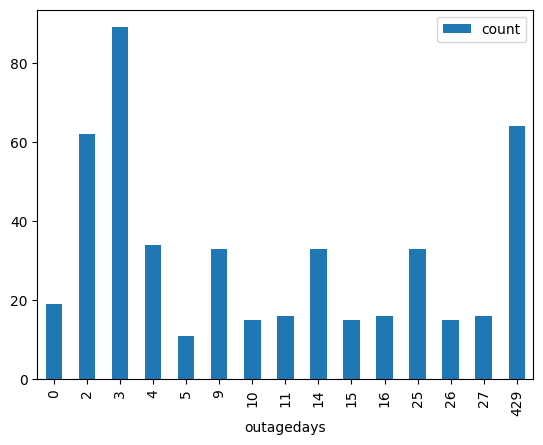

In [267]:
import matplotlib.pyplot as plt
outage_day_counts.plot(kind='bar')

In [268]:
#looking at this distribution, the median seems like the more accurate measure of the "average" outage days. 

In [269]:
el_capital = combined_el[combined_el['reason']=='Capital Replacement']
el_capital_current = el_capital[el_capital['isupcomingoutage']=='N']
el_capital_current.shape

(1792, 13)

In [270]:
#average duration of capital replacement
el_capital_current['estimatedoutagetime'] = el_capital_current['estimatedreturntoservice']-el_capital_current['outagedate']
el_capital_current['estimatedoutagetime'].median()

/var/folders/xs/c_4kjb4j5q9bjbh4l5y3p9g40000gn/T/ipykernel_9125/789284049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  el_capital_current['estimatedoutagetime'] = el_capital_current['estimatedreturntoservice']-el_capital_current['outagedate']


Timedelta('241 days 23:49:00')

In [271]:
el_maintenance = combined_el[combined_el['reason']=='Maintenance']
el_maintenance_current = el_maintenance[el_maintenance['isupcomingoutage']=='N']
el_maintenance_current.shape

(157, 13)

In [272]:
#average duration of maintenance outages
el_maintenance_current['estimatedoutagetime'] = el_maintenance_current['estimatedreturntoservice']-el_maintenance_current['outagedate']
el_maintenance_current['estimatedoutagetime'].median()

/var/folders/xs/c_4kjb4j5q9bjbh4l5y3p9g40000gn/T/ipykernel_9125/588920917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  el_maintenance_current['estimatedoutagetime'] = el_maintenance_current['estimatedreturntoservice']-el_maintenance_current['outagedate']


Timedelta('0 days 06:40:00')

In [273]:
el_maintenance_current.head()

,station,borough,trainno,equipment,equipmenttype,serving,ADA,outagedate,estimatedreturntoservice,reason,isupcomingoutage,ismaintenanceoutage,timestamp,estimatedoutagetime
61,3 Av-149 St,NaN,2/5,EL129,EL,3rd Ave & 149 St (SW corner) to Bronx-bound pl...,Y,2025-08-01 23:15:00,2025-08-04 07:00:00,Maintenance,N,N,2025-08-03 13:27:07.434974-04:00,2 days 07:45:00
260,3 Av-149 St,NaN,2/5,EL129,EL,3rd Ave & 149 St (SW corner) to Bronx-bound pl...,Y,2025-08-01 23:15:00,2025-08-04 07:00:00,Maintenance,N,N,2025-08-04 05:30:24.147287-04:00,2 days 07:45:00
272,Jamaica Center-Parsons/Archer,NaN,E/J/Z,EL412,EL,Archer Ave & Parsons Blvd (SW corner) to mezza...,Y,2025-08-03 23:00:00,2025-08-04 06:00:00,Maintenance,N,N,2025-08-04 05:30:24.147287-04:00,0 days 07:00:00
273,86 St,NaN,Q,EL249,EL,mezzanine to platform for service in both dire...,Y,2025-08-03 23:10:00,2025-08-04 06:00:00,Maintenance,N,N,2025-08-04 05:30:24.147287-04:00,0 days 06:50:00
274,Inwood-207 St,NaN,A,EL148,EL,207 St & Broadway (NW corner) to mezzanine for...,Y,2025-08-03 23:15:00,2025-08-04 06:18:00,Maintenance,N,N,2025-08-04 05:30:24.147287-04:00,0 days 07:03:00


In [274]:
#Maintenance outages were almost always less than a day and typically took plae during overnight hours

In [275]:
#How many elevators were out of service on any given day? 
combined_el['date_recorded'] = combined_el['timestamp'].dt.date
combined_el.head(2)

/var/folders/xs/c_4kjb4j5q9bjbh4l5y3p9g40000gn/T/ipykernel_9125/1747069478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_el['date_recorded'] = combined_el['timestamp'].dt.date


,station,borough,trainno,equipment,equipmenttype,serving,ADA,outagedate,estimatedreturntoservice,reason,isupcomingoutage,ismaintenanceoutage,timestamp,date_recorded
8,42St/Port Authority-Bus Terminal,NaN,A/C/E/N/Q/R/W/1/2/3/7/S,EL290X,EL,intermediate landing to mezzanine for A/C/E se...,Y,2024-10-28 06:26:00,2025-12-31 22:00:00,Repair,N,N,2025-08-03 13:27:07.434974-04:00,2025-08-03
9,161 St-Yankee Stadium,NaN,B/D/4,EL131,EL,161 St & River Ave (NE corner) to mezzanine to...,Y,2024-11-04 08:25:00,2026-01-01 23:59:00,Capital Replacement,N,N,2025-08-03 13:27:07.434974-04:00,2025-08-03


In [276]:
daily_out = combined_el[combined_el['isupcomingoutage']=='N']
daily_out.shape

(2745, 14)

In [277]:
daily_out.groupby('date_recorded').count()

,station,borough,trainno,equipment,equipmenttype,serving,ADA,outagedate,estimatedreturntoservice,reason,isupcomingoutage,ismaintenanceoutage,timestamp
date_recorded,,,,,,,,,,,,,
2025-08-02,127,0,127,127,127,127,127,127,127,127,127,127,127
2025-08-03,949,0,949,949,949,949,949,949,949,949,949,949,949
2025-08-04,933,0,930,933,933,933,933,933,933,933,933,933,933
2025-08-05,736,0,734,736,736,736,736,736,736,736,736,736,736


In [279]:
#Looking into some other outage reasons
combined_el['reason'].value_counts()

reason
Capital Replacement                2048
Maintenance                        1697
Repair                              471
Planned Work                        237
Station is Under Rehabilitation     113
Warranty Repair                      64
Under Investigation                  53
Inspection                           29
Access Improvements                   1
Name: count, dtype: int64

In [281]:
investigation_df = combined_el[combined_el['reason']=='Under Investigation']

In [284]:
investigation_df.equipment.value_counts()

equipment
EL182    14
EL107     5
EL103     4
EL232     4
EL783     3
EL142     2
EL425     2
EL391     2
EL512     2
EL123     2
EL424     2
EL143     1
EL104     1
EL205     1
EL406     1
EL446     1
EL722     1
EL345     1
EL601     1
EL210     1
EL443     1
EL509     1
Name: count, dtype: int64

In [295]:
el_repairs[el_repairs['equipment'].isin(investigation_df['equipment'])==True]

,station,borough,trainno,equipment,equipmenttype,serving,ADA,outagedate,estimatedreturntoservice,reason,isupcomingoutage,ismaintenanceoutage,timestamp,estimatedoutagetime,outagedays
66,191 St,NaN,1,EL103,EL,191 St & St Nicholas Ave (SW corner) to mezzan...,N,2025-08-03 00:20:00,2025-08-05 06:00:00,Repair,N,N,2025-08-03 13:27:07.434974-04:00,2 days 05:40:00,2
263,191 St,NaN,1,EL103,EL,191 St & St Nicholas Ave (SW corner) to mezzan...,N,2025-08-03 00:20:00,2025-08-05 06:00:00,Repair,N,N,2025-08-04 05:30:24.147287-04:00,2 days 05:40:00,2
382,Gun Hill Rd,NaN,2/5,EL182,EL,Gun Hill Rd to Wakefield 241 St-bound platform,Y,2025-08-04 18:03:00,2025-08-05 03:00:00,Repair,N,N,2025-08-05 01:00:46.292249-04:00,0 days 08:57:00,0
486,191 St,NaN,1,EL103,EL,191 St & St Nicholas Ave (SW corner) to mezzan...,N,2025-08-03 00:20:00,2025-08-05 06:00:00,Repair,N,N,2025-08-04 03:49:03.683955-04:00,2 days 05:40:00,2
707,191 St,NaN,1,EL103,EL,191 St & St Nicholas Ave (SW corner) to mezzan...,N,2025-08-03 00:20:00,2025-08-05 06:00:00,Repair,N,N,2025-08-04 08:18:13.231330-04:00,2 days 05:40:00,2
825,191 St,NaN,1,EL103,EL,191 St & St Nicholas Ave (SW corner) to mezzan...,N,2025-08-03 00:20:00,2025-08-05 06:00:00,Repair,N,N,2025-08-03 08:14:34.375212-04:00,2 days 05:40:00,2
827,191 St,NaN,1,EL104,EL,191 St & St Nicholas Ave (SW corner) to mezzan...,N,2025-08-03 02:03:00,2025-08-03 11:00:00,Repair,N,N,2025-08-03 08:14:34.375212-04:00,0 days 08:57:00,0
1255,191 St,NaN,1,EL103,EL,191 St & St Nicholas Ave (SW corner) to mezzan...,N,2025-08-03 00:20:00,2025-08-05 06:00:00,Repair,N,N,2025-08-03 11:09:58.557766-04:00,2 days 05:40:00,2
1453,191 St,NaN,1,EL103,EL,191 St & St Nicholas Ave (SW corner) to mezzan...,N,2025-08-03 00:20:00,2025-08-05 06:00:00,Repair,N,N,2025-08-04 06:23:57.064958-04:00,2 days 05:40:00,2
1570,Westchester Sq-East Tremont Av,NaN,6,EL512,EL,Street (NW corner of Westchester Av and Lane A...,Y,2025-08-02 16:38:00,2025-08-03 01:00:00,Repair,N,N,2025-08-02 23:11:26.330003-04:00,0 days 08:22:00,0


In [ ]:
#What percentage of outages were unplanned
